# <font color=blue>Import  
    

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

<br>  

# <font color=blue>Create dataframe with start time and end time of jobs  
    

In [2]:
df1 = {'job'       : [           'job_1',            'job_3',            'job_2',            'job_4'],
       'start_time': ['2022-11-06 09:00', '2022-11-06 09:23', '2022-11-06 09:10', '2022-11-06 10:00'],
       'end_time'  : ['2022-11-06 09:15', '2022-11-06 09:40', '2022-11-06 09:25', '2022-11-06 11:00']}

In [3]:
df1 = pd.DataFrame(df1)

In [4]:
df1['start_time'] = pd.to_datetime(df1['start_time'])

In [5]:
df1['end_time'] = pd.to_datetime(df1['end_time'])

In [6]:
df1

,job,start_time,end_time
0,job_1,2022-11-06 09:00:00,2022-11-06 09:15:00
1,job_3,2022-11-06 09:23:00,2022-11-06 09:40:00
2,job_2,2022-11-06 09:10:00,2022-11-06 09:25:00
3,job_4,2022-11-06 10:00:00,2022-11-06 11:00:00


<br>  

# <font color=blue>Utilisation inflated  
    

In [7]:
df1['duration_min'] = (df1['end_time'] - df1['start_time']).dt.total_seconds()/60

In [8]:
print('total duration: {} minutes'.format(df1['duration_min'].sum()))

total duration: 107.0 minutes


<br>  

# <font color=blue>Correct start time and end time of jobs to remove overlap  
    

In [9]:
df1.sort_values(by = ['start_time'], inplace = True)

In [10]:
df1.reset_index(inplace = True, drop = True)

In [11]:
df1

,job,start_time,end_time,duration_min
0,job_1,2022-11-06 09:00:00,2022-11-06 09:15:00,15.0
1,job_2,2022-11-06 09:10:00,2022-11-06 09:25:00,15.0
2,job_3,2022-11-06 09:23:00,2022-11-06 09:40:00,17.0
3,job_4,2022-11-06 10:00:00,2022-11-06 11:00:00,60.0


In [12]:
j = len(df1) - 1
for i in range(len(df1)):
    if i != j:
        if (df1.loc[i, 'start_time'] < df1.loc[i + 1, 'start_time']) and (df1.loc[i + 1, 'start_time'] < df1.loc[i, 'end_time']):
            df1.loc[i, 'end_time'] = df1.loc[i + 1, 'start_time']

In [13]:
df1

,job,start_time,end_time,duration_min
0,job_1,2022-11-06 09:00:00,2022-11-06 09:10:00,15.0
1,job_2,2022-11-06 09:10:00,2022-11-06 09:23:00,15.0
2,job_3,2022-11-06 09:23:00,2022-11-06 09:40:00,17.0
3,job_4,2022-11-06 10:00:00,2022-11-06 11:00:00,60.0


<br>  

# <font color=blue>Utilisation not inflated  
    

In [14]:
df1['duration_min'] = (df1['end_time'] - df1['start_time']).dt.total_seconds()/60

In [15]:
print('total duration: {} minutes'.format(df1['duration_min'].sum()))

total duration: 100.0 minutes


<br>  

# <font color=blue>Function to get job number  
    

In [16]:
def find_job_y_value(input_value):
    position_of_underscore_in_input_value = input_value.find('_')
    length_of_input_value = len(input_value)
    job_y_value = int(input_value[ position_of_underscore_in_input_value + 1 : length_of_input_value ])
    return job_y_value

<br>  

# <font color=blue>Format dataframe (from wide to long) to facilitate plotting  
<font color=blue>Use function to get job number
    

In [17]:
df2 = pd.DataFrame(columns=['job', 'job_y_value', 'time', 'source'])

In [18]:
j = 0
for i in range(len(df1)):
    df2.loc[i + j, 'job'] = df1['job'][i]
    df2.loc[i + j, 'job_y_value'] = int(find_job_y_value(df1['job'][i]))
    df2.loc[i + j, 'time'] = df1['start_time'][i]
    df2.loc[i + j, 'source'] = 'start'
    df2.loc[i + j + 1, 'job'] = df1['job'][i]
    df2.loc[i + j + 1, 'job_y_value'] = int(find_job_y_value(df1['job'][i]))
    df2.loc[i + j + 1, 'time'] = df1['end_time'][i]
    df2.loc[i + j + 1, 'source'] = 'end'
    j = j + 1

In [19]:
df2['time'] = pd.to_datetime(df2['time'])

In [20]:
df2['job_y_value'] = df2['job_y_value'].astype(int)

In [21]:
df2

,job,job_y_value,time,source
0,job_1,1,2022-11-06 09:00:00,start
1,job_1,1,2022-11-06 09:10:00,end
2,job_2,2,2022-11-06 09:10:00,start
3,job_2,2,2022-11-06 09:23:00,end
4,job_3,3,2022-11-06 09:23:00,start
5,job_3,3,2022-11-06 09:40:00,end
6,job_4,4,2022-11-06 10:00:00,start
7,job_4,4,2022-11-06 11:00:00,end


<br>  

# <font color=blue>Create 5-minute time interval for x-axis  
    

In [22]:
x_interval = pd.date_range(start = '2022-11-06 08:30:00', end = '2022-11-06 11:30:00', periods = 37)

In [23]:
x_interval

DatetimeIndex(['2022-11-06 08:30:00', '2022-11-06 08:35:00',
               '2022-11-06 08:40:00', '2022-11-06 08:45:00',
               '2022-11-06 08:50:00', '2022-11-06 08:55:00',
               '2022-11-06 09:00:00', '2022-11-06 09:05:00',
               '2022-11-06 09:10:00', '2022-11-06 09:15:00',
               '2022-11-06 09:20:00', '2022-11-06 09:25:00',
               '2022-11-06 09:30:00', '2022-11-06 09:35:00',
               '2022-11-06 09:40:00', '2022-11-06 09:45:00',
               '2022-11-06 09:50:00', '2022-11-06 09:55:00',
               '2022-11-06 10:00:00', '2022-11-06 10:05:00',
               '2022-11-06 10:10:00', '2022-11-06 10:15:00',
               '2022-11-06 10:20:00', '2022-11-06 10:25:00',
               '2022-11-06 10:30:00', '2022-11-06 10:35:00',
               '2022-11-06 10:40:00', '2022-11-06 10:45:00',
               '2022-11-06 10:50:00', '2022-11-06 10:55:00',
               '2022-11-06 11:00:00', '2022-11-06 11:05:00',
               '2022-11-

<br>  

# <font color=blue>AFTER: Start time and end time of jobs do not overlap each other  
    

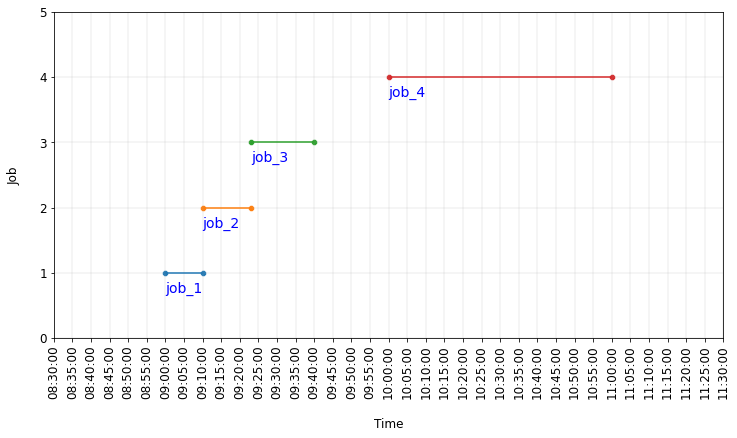

In [24]:
fig, axs = plt.subplots(1, 1, figsize = (12, 6))

for i in range(0, len(df2), 2):
    sns.scatterplot(data = df2[i:i + 2], x = 'time', y = 'job_y_value')
    sns.lineplot(data = df2[i:i + 2], x = 'time', y = 'job_y_value', estimator = None)
    axs.text(df2.loc[i, 'time'], df2.loc[i, 'job_y_value'] - 0.3, df2.loc[i, 'job'], fontsize = 14, color = 'blue');

axs.set_xlim(datetime(2022, 11, 6, 8, 30, 0), datetime(2022, 11, 6, 11, 30, 0))
axs.set_xticks(x_interval)
axs.set_xticklabels(x_interval.strftime('%H:%M:%S'), rotation = 90, fontsize = 12);
axs.set_xlabel(xlabel = '\nTime', fontsize = 12, color = 'black')

axs.set_ylim(0, 5, 1)
axs.set_yticks([0, 1, 2, 3, 4, 5])
axs.set_yticklabels([0, 1, 2, 3, 4, 5], fontsize = 12, rotation = 0);
axs.set_ylabel(ylabel = 'Job\n', fontsize = 12, color = 'black')

axs.xaxis.grid(True, linewidth = 0.25)
axs.yaxis.grid(True, linewidth = 0.25)